In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
# Load the libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('final.csv')

In [57]:
df.rename(columns={'Matched_Keywords': 'Type'}, inplace=True)

In [58]:
df.head()

,Place,City,Review,Rating,Type,Review_Count,Best_time_to_visit,popularity
0,1 MG Lido Mall,Bengaluru,decorative elegant think kulfi cuisines friend...,4.26,Sports Gurudwara Food Tea Commercial Lake Chur...,107,OctoberMarch,0.852000
1,10 Acres Mall,Ahmedabad,cinema closed wash theatre reliance extra skip...,3.20,Commercial Entertainment Building Mall Shopping,5,July-March,0.361667
2,1008 Lingam Temple,Salem,peryakovil suitable security mission vinayaga ...,4.30,Hill Food Religious Ground Temple Mountain Cen...,90,September-March,0.860000
3,101 Ft. Hanuman Idol,Chhindwara,p pradesh near come tall lord surroundings lar...,4.50,Park,4,October-March,0.483333
4,108 Feet Height Statue Of Basaveshwara,Bidar,memorable camera marauders authority mantap as...,4.00,Religious Temple Monument Fort Development,10,JulyOctober,0.483333


In [59]:
df.shape

(13751, 8)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13751 entries, 0 to 13750
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Place               13751 non-null  object 
 1   City                13751 non-null  object 
 2   Review              13751 non-null  object 
 3   Rating              13751 non-null  float64
 4   Type                13751 non-null  object 
 5   Review_Count        13751 non-null  int64  
 6   Best_time_to_visit  13751 non-null  object 
 7   popularity          13751 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 859.6+ KB


In [61]:
df.isnull().sum()

Place                 0
City                  0
Review                0
Rating                0
Type                  0
Review_Count          0
Best_time_to_visit    0
popularity            0
dtype: int64

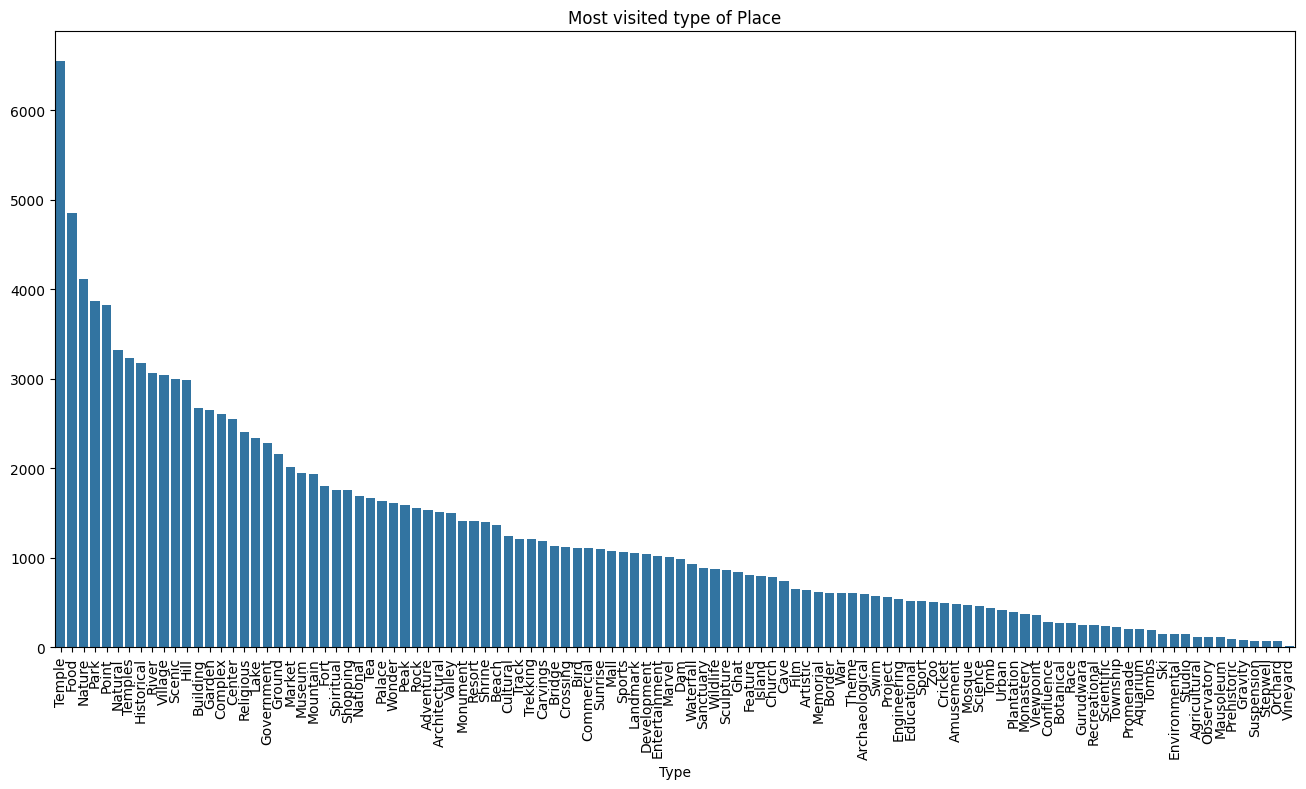

In [62]:
word_counts = df['Type'].str.split(expand=True).stack().value_counts()

# Plot the word counts
plt.figure(figsize=(16, 8))
sns.barplot(x=word_counts.index, y=word_counts.values)
plt.title("Most visited type of Place")
plt.xlabel("Type")
plt.xticks(rotation=90)
plt.show()

In [63]:
df["Best_time_to_visit"].unique()

array(['OctoberMarch', 'July-March', 'September-March', 'October-March',
       'JulyOctober', '-', 'April-October', 'SeptemberJune',
       'October-February', 'December-February', 'November-March',
       'October-May', 'October-June', '-February', 'November-February',
       'June-October', 'March-June', 'September-June',
       'September-February'], dtype=object)

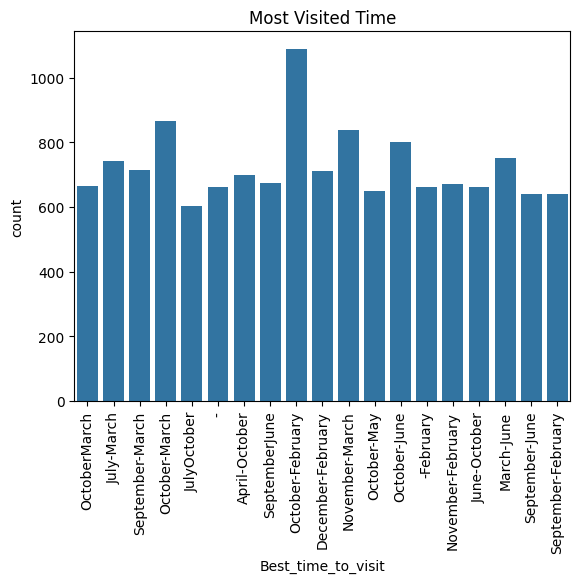

In [64]:
sns.countplot(x="Best_time_to_visit",data=df)
plt.title("Most Visited Time")
plt.xticks(rotation=90)
plt.show()

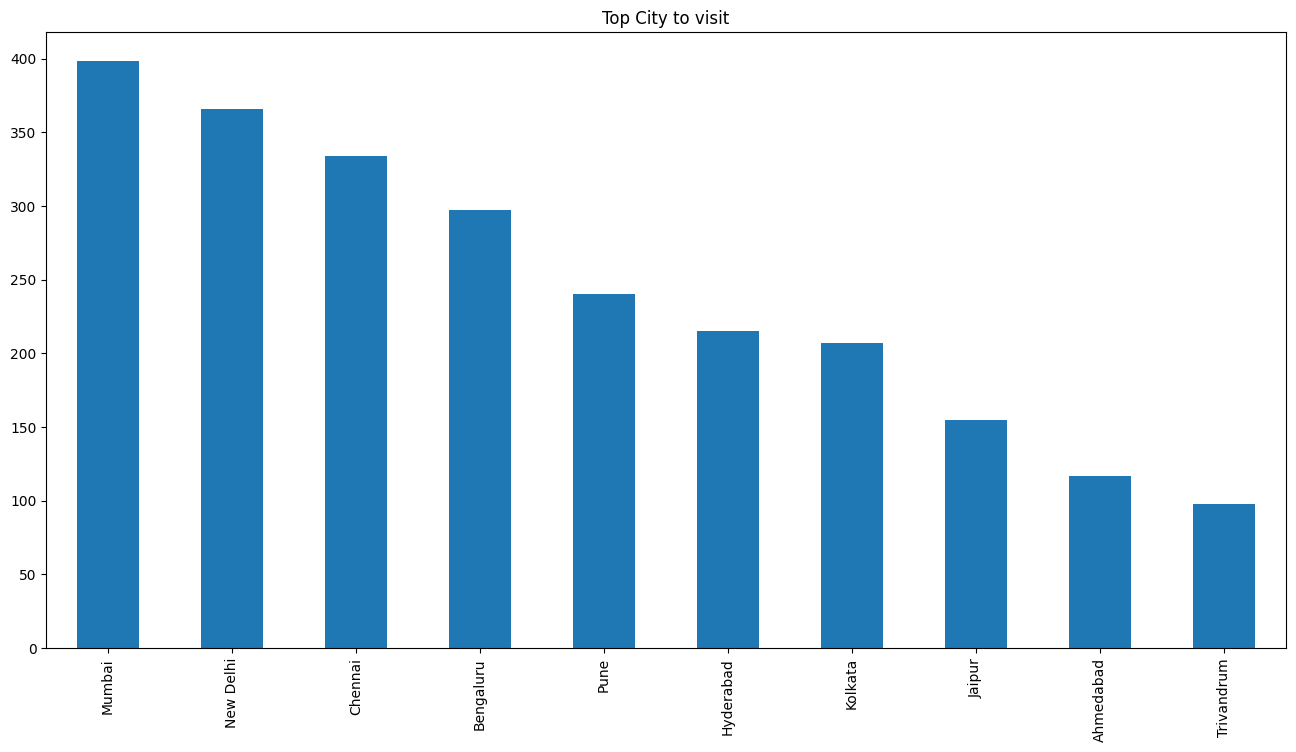

In [65]:
plt.figure(figsize=(16,8))
Top_city = (df["City"].value_counts()).head(10)
Top_city.plot(kind="bar")
plt.title("Top City to visit")
plt.xticks(rotation=90)
plt.show()

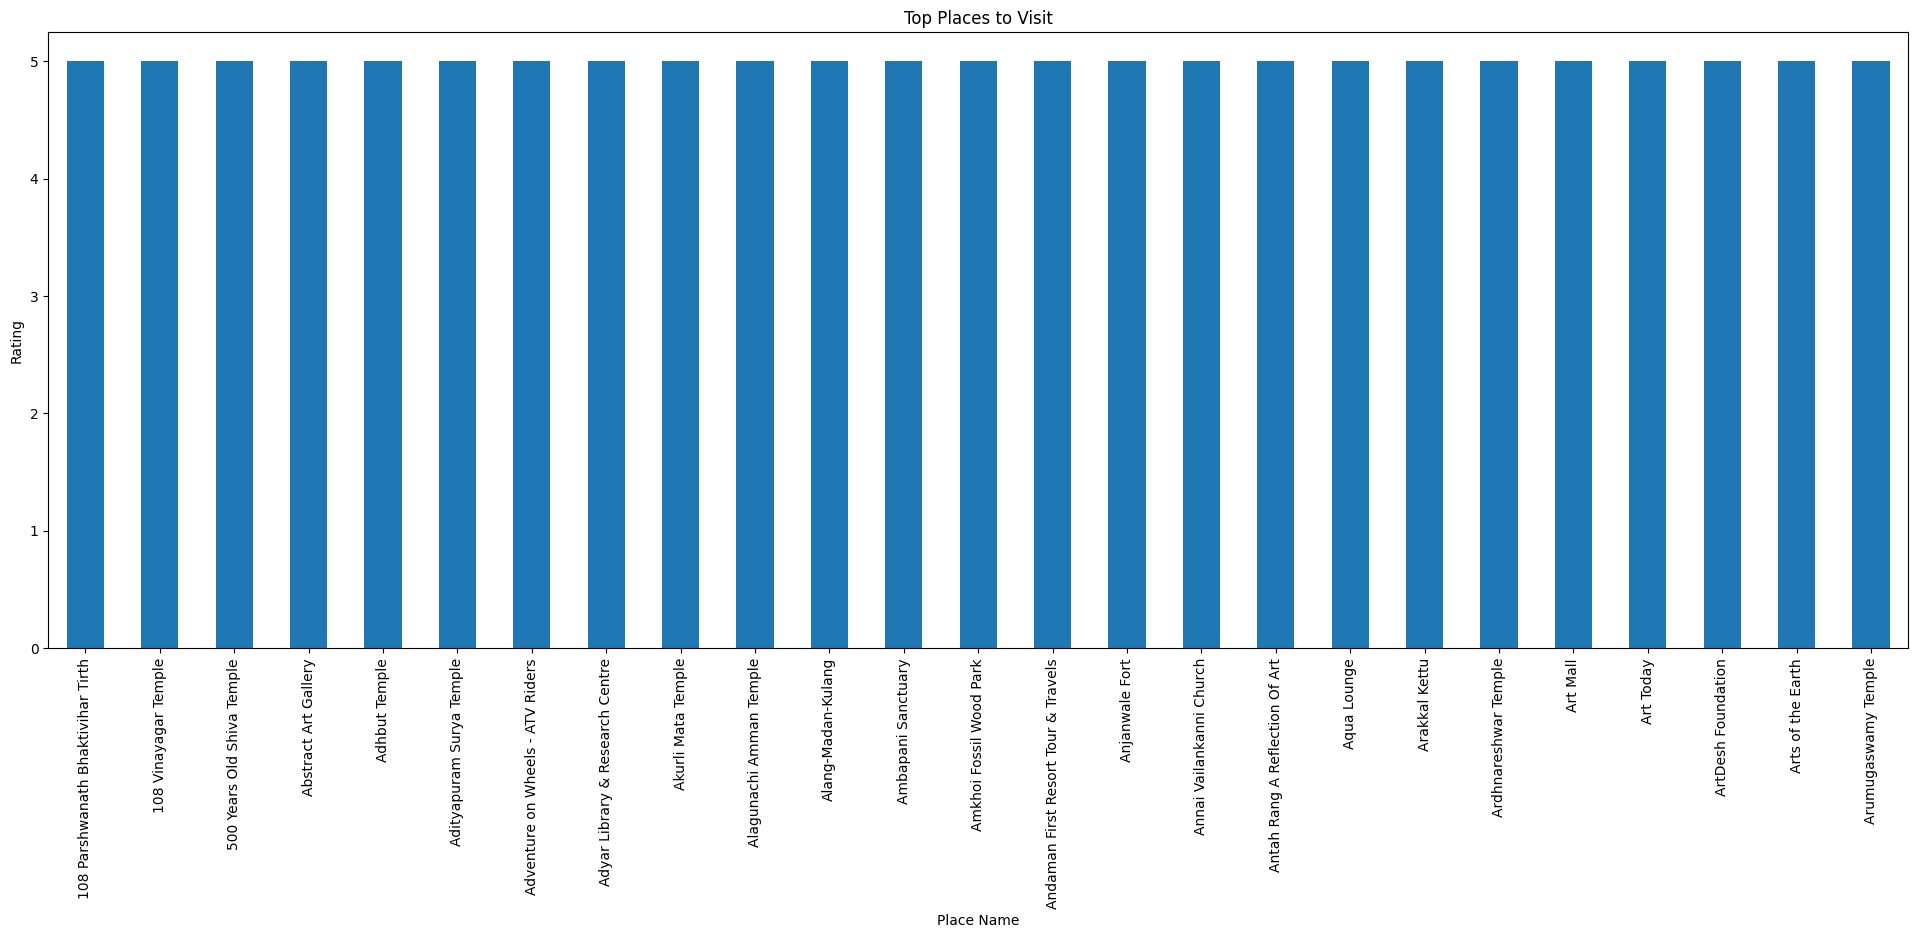

In [66]:
# Get the top 10 places by Rating index
top_places = df.groupby('Place')['Rating'].max().nlargest(25)

# Plot the top 10 places
plt.figure(figsize=(24, 8))
top_places.plot(kind="bar")
plt.title("Top Places to Visit")
plt.xlabel("Place Name")
plt.ylabel("Rating")
plt.xticks(rotation=90)
plt.show()

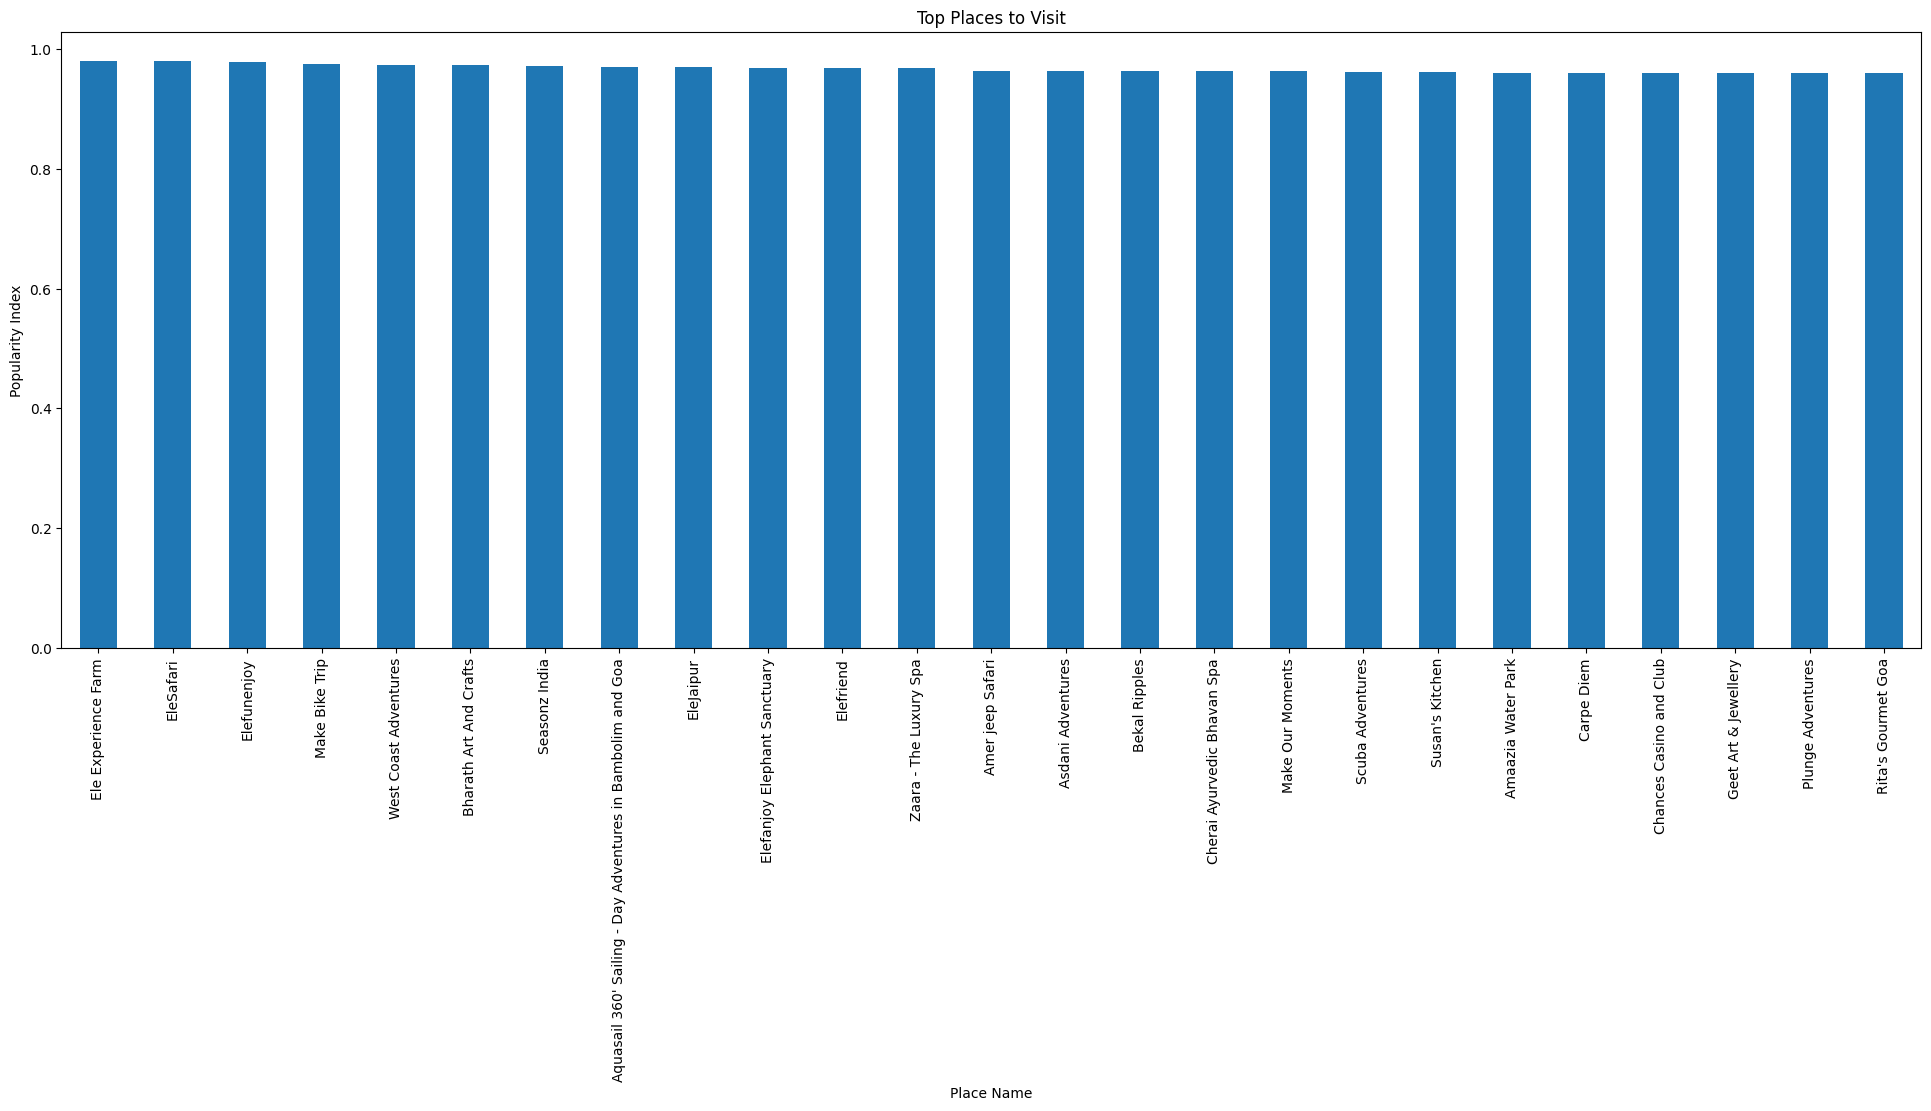

In [67]:
# Get the top 10 places by popularity index
top_places = df.groupby('Place')['popularity'].max().nlargest(25)

# Plot the top 10 places
plt.figure(figsize=(24, 8))
top_places.plot(kind="bar")
plt.title("Top Places to Visit")
plt.xlabel("Place Name")
plt.ylabel("Popularity Index")
plt.xticks(rotation=90)
plt.show()

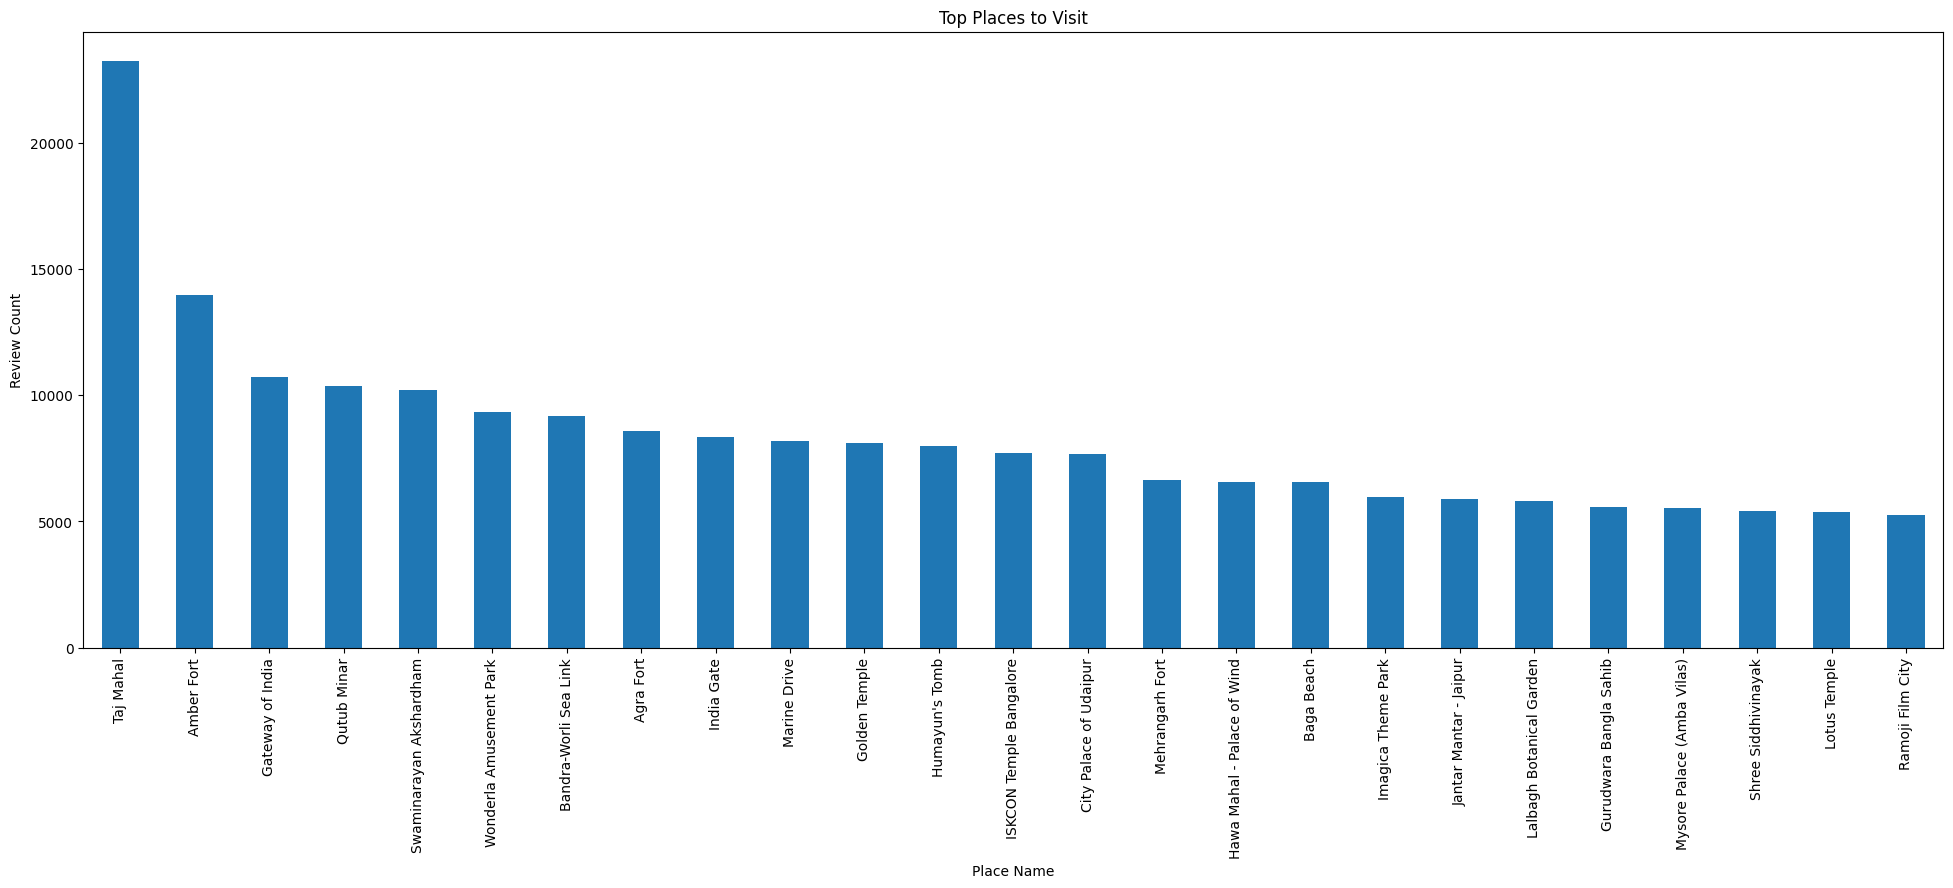

In [68]:
# Get the top 10 places by Review Count
top_places = df.groupby('Place')['Review_Count'].max().nlargest(25)

# Plot the top 10 places
plt.figure(figsize=(24, 8))
top_places.plot(kind="bar")
plt.title("Top Places to Visit")
plt.xlabel("Place Name")
plt.ylabel("Review Count")
plt.xticks(rotation=90)
plt.show()